<a href="https://colab.research.google.com/github/renad30/AIBootCamp_AIP_projects/blob/main/Day5_Deep_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

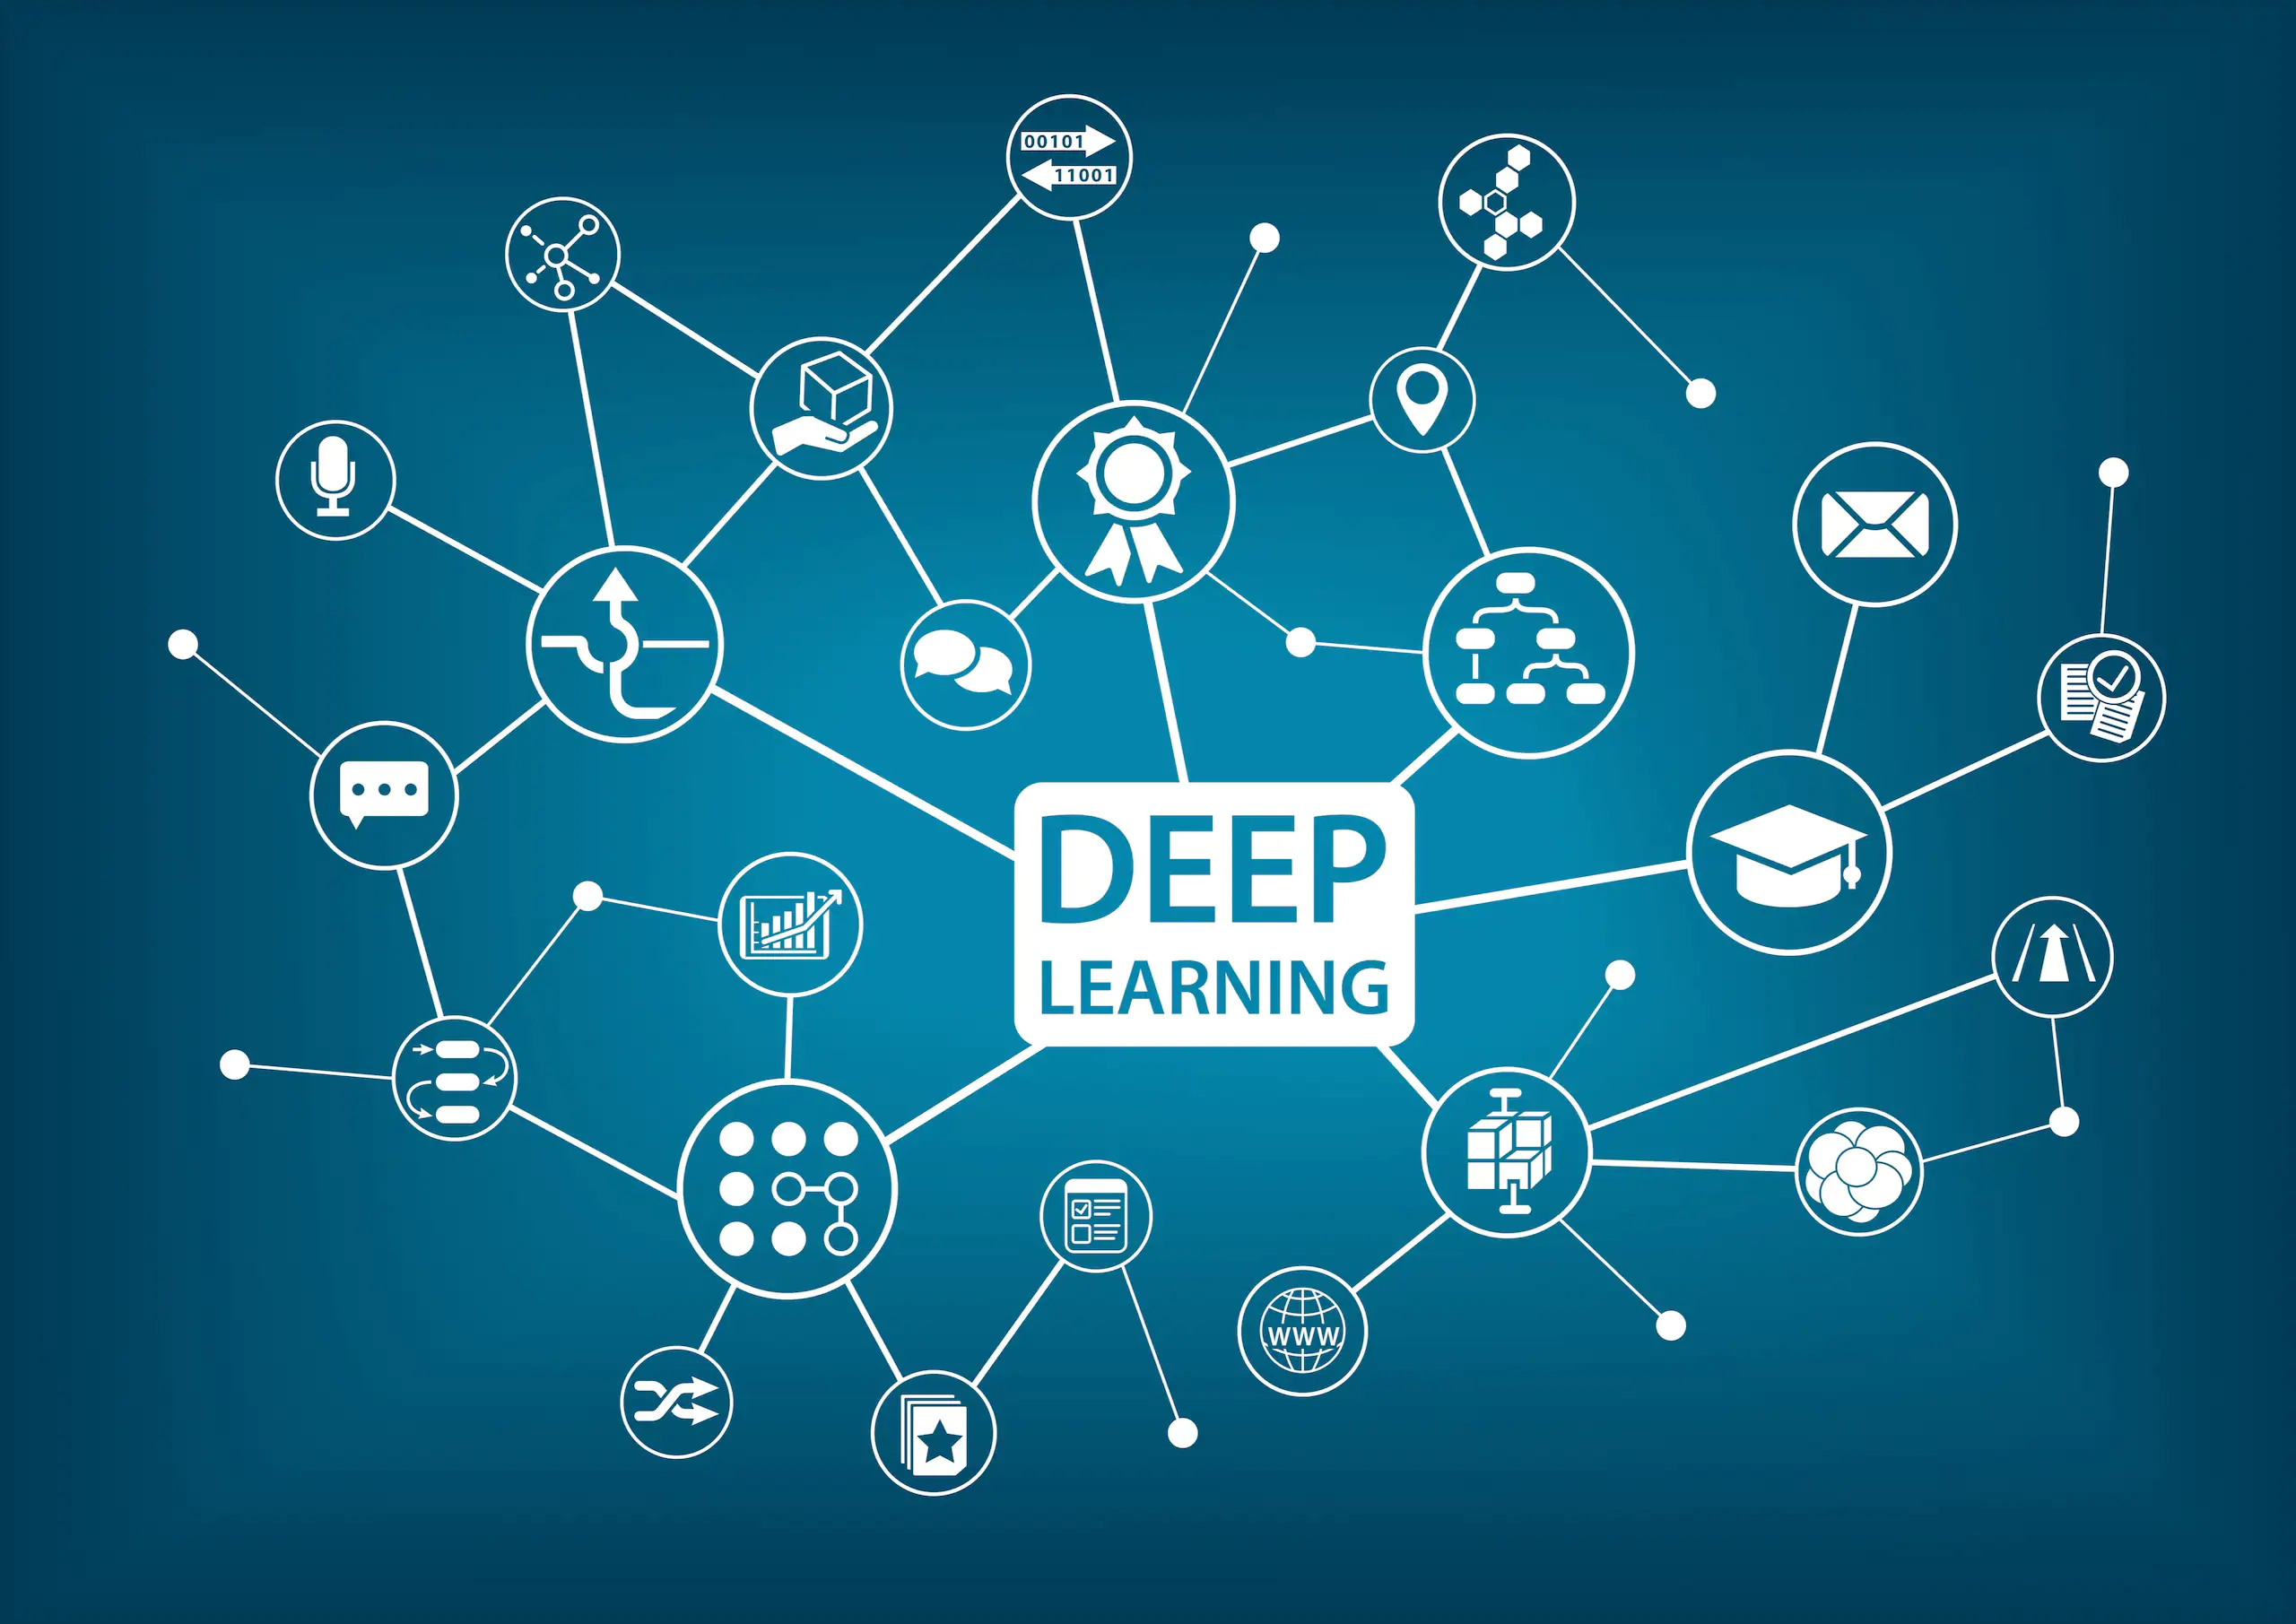


# Data analysis , Wrangling , and Visualization
- import pandas as pd
- import numpy as np
- import seaborn as sns
- import matplotlib.pyplot as plt
- %matplotlib inline

#Scaling and Train Test Split
- from sklearn.model_selection import train_test_split
- from sklearn.preprocessing import MinMaxScaler



#Creating a Model
- from tensorflow.keras.models import Sequential
- from tensorflow.keras.layers import Dense, Activation
- from tensorflow.keras.optimizers import Adam

#Evaluation on Test Data
- from sklearn.metrics import mean_squared_error,mean_absolute_error explained_variance_score

# **Data Describtion**
The following features have been provided:
- Date: Date house was sold
- Price: Price is prediction target
- Bedrooms: Number of Bedrooms/House
- Bathrooms: Number of bathrooms/House
- Sqft_Living: square footage of the home
- Sqft_Lot: square footage of the lot
- Floors: Total floors (levels) in house
- Waterfront: House which has a view to a waterfront
- View: Has been viewed
- Condition: How good the condition is ( Overall )
- Grade: grade given to the housing unit, based on King County grading system
- Sqft_Above: square footage of house apart from basement
- Sqft_Basement: square footage of the basement
- Yr_Built: Built Year
- Yr_Renovated: Year when house was renovated
- Zipcode: Zip
- Lat: Latitude coordinate
- Long: Longitude coordinate
- Sqft_Living15: Living room area in 2015(implies — some renovations)
- Sqft_Lot15: lotSize area in 2015(implies — some renovations)

# **1) Exploratory Data Analysis (EDA)**

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import Data
Data = pd.read_csv('/content/house_data.csv')
Data.head(5).T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [ ]:
#get some information about our Data-Set
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
print("Total number of house sales records in the dataset:", len(Data))

Total number of house sales records in the dataset: 21613


In [ ]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
# check if there are any Null values
Data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

In [ ]:
unique_counts = Data.nunique()

print("\nNumber of unique values in each column:")
print(unique_counts)


Number of unique values in each column:
price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
month              12
year                2
dtype: int64


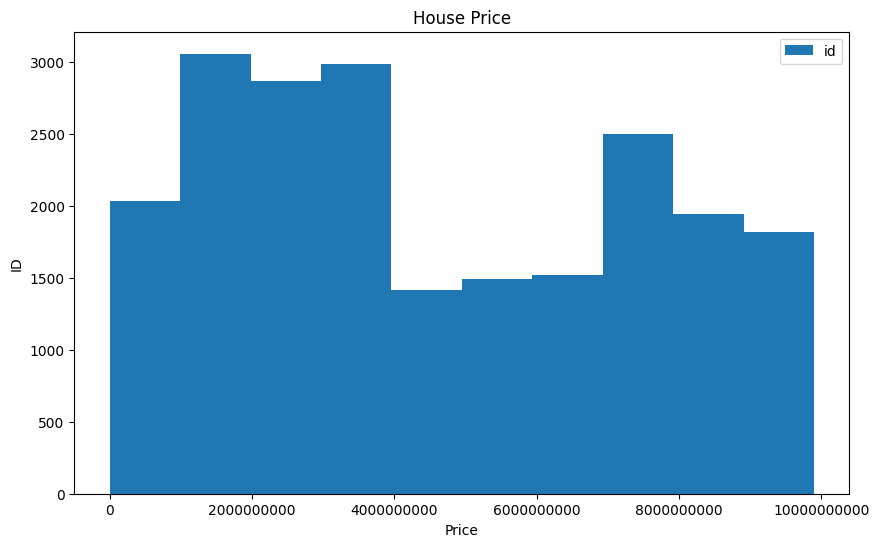

In [ ]:
#visualizing house prices
Data.plot(kind="hist" , x="price" , y = "id" , figsize=(10,6))
plt.title("House Price")
plt.xlabel("Price")
plt.ylabel("ID")
plt.ticklabel_format(style='plain')
plt.show()

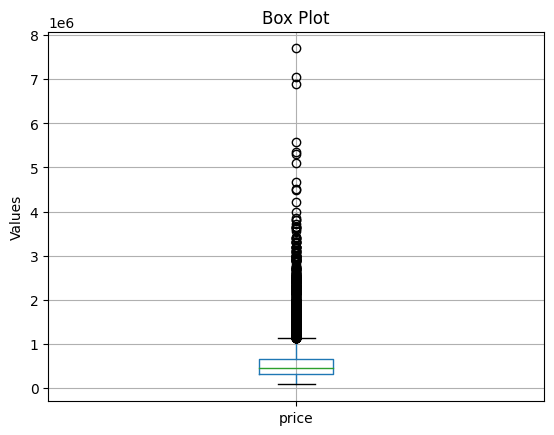

In [ ]:
Data.boxplot(column=['price'])
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()

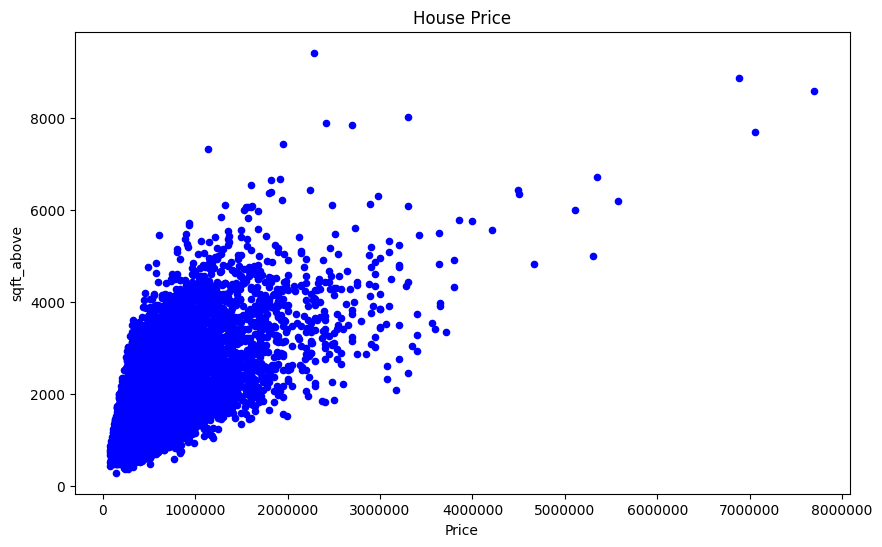

In [ ]:
#visualizing square footage of (home,lot,above and basement)
Data.plot(kind="scatter" , x="price" , y = "sqft_above" , figsize=(10,6) , color = "b")
plt.title("House Price")
plt.xlabel("Price")
plt.ylabel("sqft_above")
plt.ticklabel_format(style='plain')
plt.show()

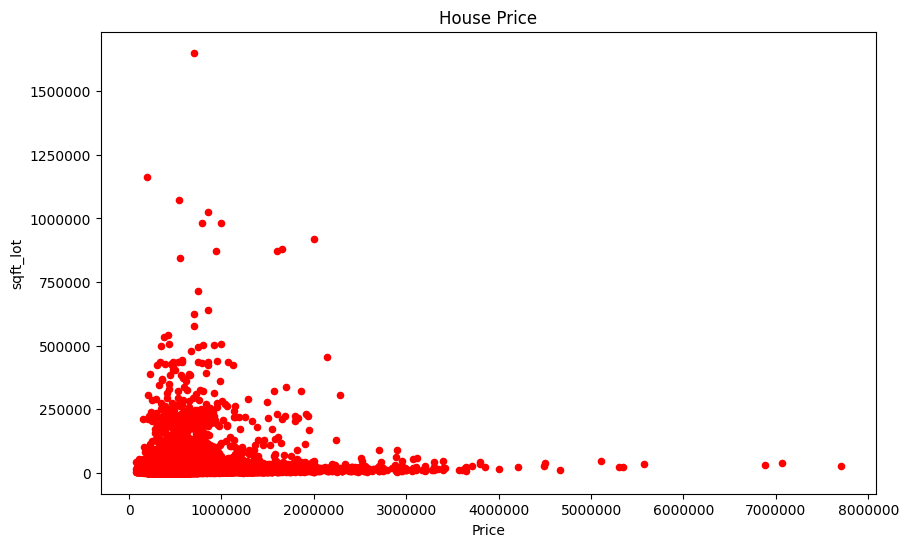

In [ ]:
#visualizing square footage of (home,lot,above and basement)
Data.plot(kind="scatter" , x="price" , y = "sqft_lot" , figsize=(10,6) , color="red")
plt.title("House Price")
plt.xlabel("Price")
plt.ylabel("sqft_lot")
plt.ticklabel_format(style='plain')
plt.show()

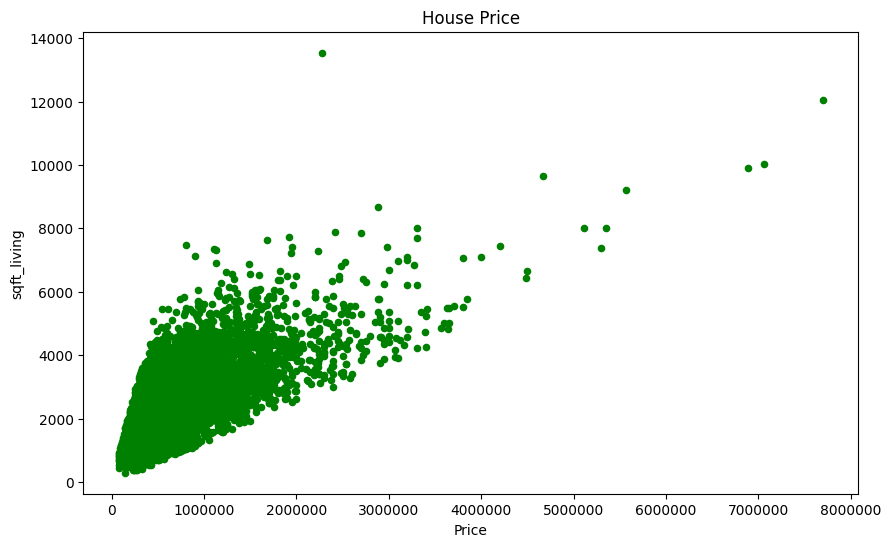

In [ ]:
#visualizing square footage of (home,lot,above and basement)
Data.plot(kind="scatter" , x="price" , y = "sqft_living" , figsize=(10,6) , color="green")
plt.title("House Price")
plt.xlabel("Price")
plt.ylabel("sqft_living")
plt.ticklabel_format(style='plain')
plt.show()

# **Feature Selection**

to build an accurate predictive model, There are several features that do not significantly contribute to predicting home prices.

Date: not be a strong predictor of home prices. While it could be relevant for time-series analysis or understanding market trends over time

ID: it used ti identify each house

Street, City, Statezip, and Country: Categorical features like 'street,' 'city,' 'statezip,' and 'country' can indeed influence home prices, but they can be challenging to use directly in predictive models. One-hot encoding or label encoding these features may lead to a high dimensionality problem and may not always yield substantial improvements in predictive accuracy

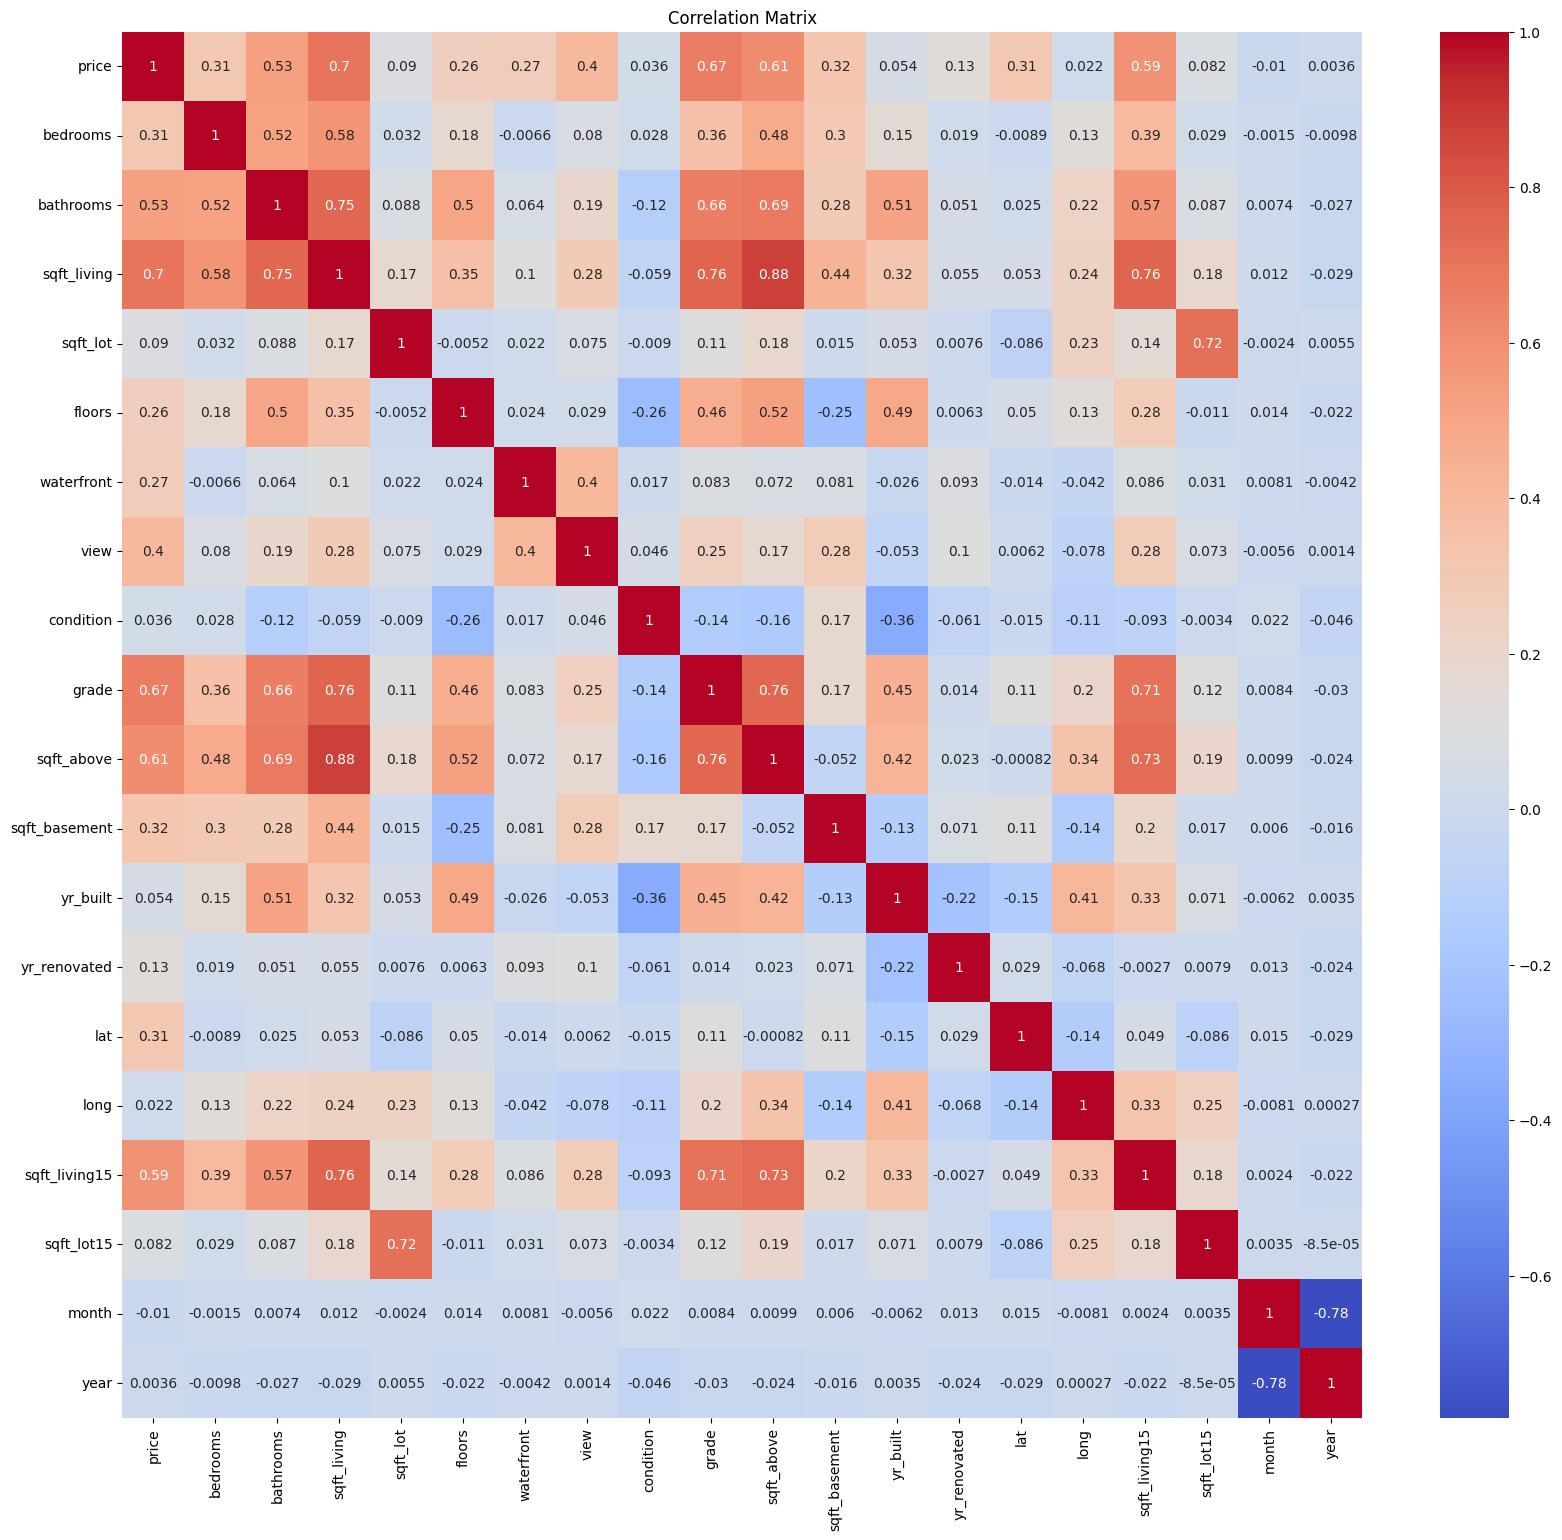

In [ ]:
# Use a heatmap to see which features have strongest correlation with house price
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

correlation_matrix = Data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# drop some unnecessary columns
columns_to_remove = ['date', 'id', 'zipcode']
Data = Data.drop(columns=columns_to_remove)
Data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570


# **Outlier Removal**

In [ ]:
from scipy import stats

Data_copy = Data.copy()
numeric_columns = Data_copy.select_dtypes(include=['number']).columns.tolist()
z_scores = stats.zscore(Data_copy[numeric_columns])
threshold = 6
print("Size before removing outliers:", Data.shape)
outliers_df = Data_copy[(z_scores > threshold).any(axis=1)]
Data_copy = Data_copy[(z_scores <= threshold).all(axis=1)]
print("Size after removing outliers:", Data_copy.shape)

Size before removing outliers: (21613, 20)
Size after removing outliers: (21129, 20)


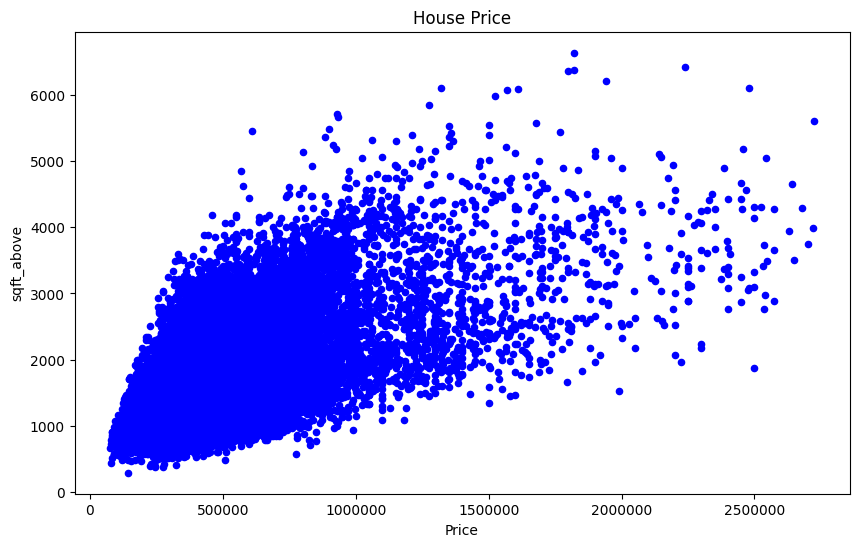

In [ ]:
Data_copy.plot(kind="scatter" , x="price" , y = "sqft_above" , figsize=(10,6) , color = "b")
plt.title("House Price")
plt.xlabel("Price")
plt.ylabel("sqft_above")
plt.ticklabel_format(style='plain')
plt.show()

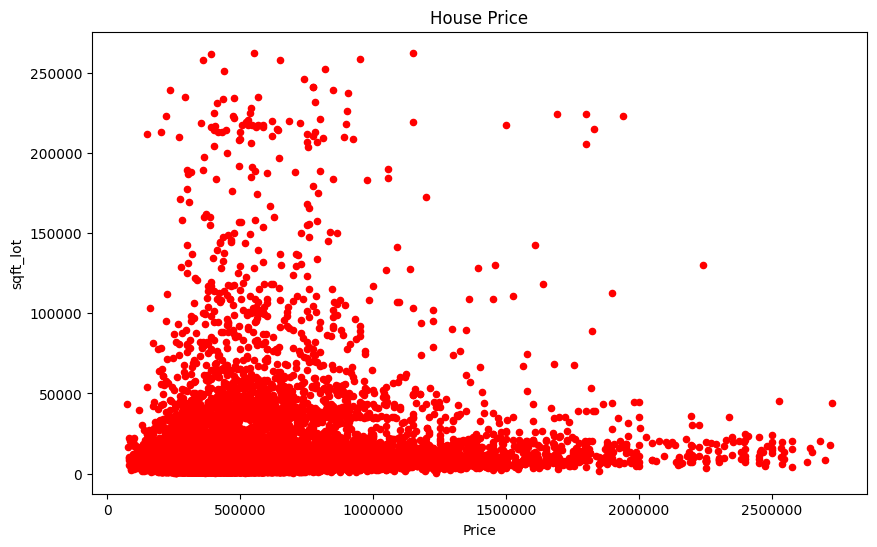

In [ ]:
Data_copy.plot(kind="scatter" , x="price" , y = "sqft_lot" , figsize=(10,6) , color="red")
plt.title("House Price")
plt.xlabel("Price")
plt.ylabel("sqft_lot")
plt.ticklabel_format(style='plain')
plt.show()

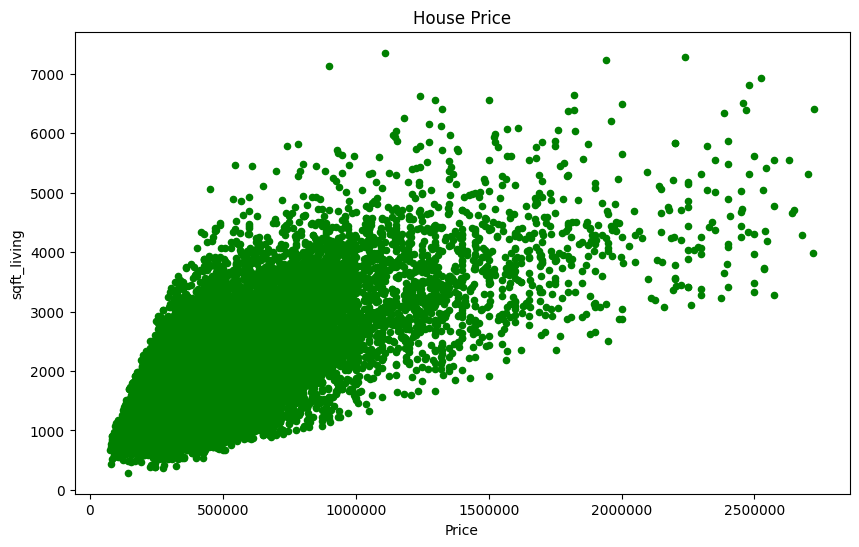

In [ ]:
Data_copy.plot(kind="scatter" , x="price" , y = "sqft_living" , figsize=(10,6) , color="green")
plt.title("House Price")
plt.xlabel("Price")
plt.ylabel("sqft_living")
plt.ticklabel_format(style='plain')
plt.show()

# **2) Scaling and Train Test Split**

In [ ]:
#splitting Train and Test
from sklearn.model_selection import train_test_split

X = Data.drop('price',axis =1).values
y = Data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14480, 19)
(7133, 19)
(14480,)
(7133,)


In [ ]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(float))
X_test = s_scaler.transform(X_test.astype(float))

pd.DataFrame( X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.502412,-0.476921,-0.676901,-0.109403,-0.922632,-0.08709,-0.308021,-0.623700,-0.561381,-0.400121,-0.657096,0.403241,-0.211673,-1.117835,0.250030,-0.773544,-0.164812,1.093590,-0.689960
1,-0.404898,0.497972,-0.381712,-0.191581,0.925695,-0.08709,-0.308021,-0.623700,0.292754,-0.073693,-0.657096,0.775536,-0.211673,-2.150346,-0.670195,-0.304647,-0.208985,0.773551,-0.689960
2,-0.404898,0.173008,0.011873,-0.179631,-0.922632,-0.08709,-0.308021,-0.623700,-0.561381,-0.533110,1.030188,0.234016,-0.211673,1.450780,-0.634801,-0.363259,-0.183196,-1.466717,1.449359
3,-0.404898,0.173008,0.132135,-0.181814,0.925695,-0.08709,-0.308021,0.922205,0.292754,0.494532,-0.657096,0.504776,-0.211673,1.210560,0.780930,0.442658,-0.175106,-1.466717,1.449359
4,-0.404898,1.472865,1.258226,-0.175288,0.925695,-0.08709,-0.308021,-0.623700,2.001024,1.739794,-0.657096,0.944761,-0.211673,0.539102,1.064076,1.820044,-0.178573,0.773551,-0.689960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14475,-0.404898,0.173008,-0.173987,-0.128569,0.925695,-0.08709,-0.308021,0.922205,0.292754,0.156015,-0.657096,0.437086,-0.211673,0.463129,1.184413,-0.055545,-0.093587,-0.506602,1.449359
14476,-0.404898,-1.451814,-0.917426,-0.268105,0.001532,-0.08709,-0.308021,-0.623700,-0.561381,-0.666099,-0.657096,-2.338201,-0.211673,0.284412,-0.599408,-0.451177,-0.329259,-0.826640,1.449359
14477,-0.404898,0.173008,-0.327048,-0.182343,0.925695,-0.08709,-0.308021,-0.623700,-0.561381,-0.013244,-0.657096,0.538621,-0.211673,-1.447052,1.149020,-0.700279,-0.183882,1.093590,-0.689960
14478,-1.502412,-1.451814,-1.015822,-0.235933,-0.922632,-0.08709,-0.308021,0.922205,-0.561381,-0.895808,-0.429085,-1.593612,-0.211673,0.906668,-0.733902,-0.769148,-0.303254,0.773551,-0.689960


# **3) Creating Model**

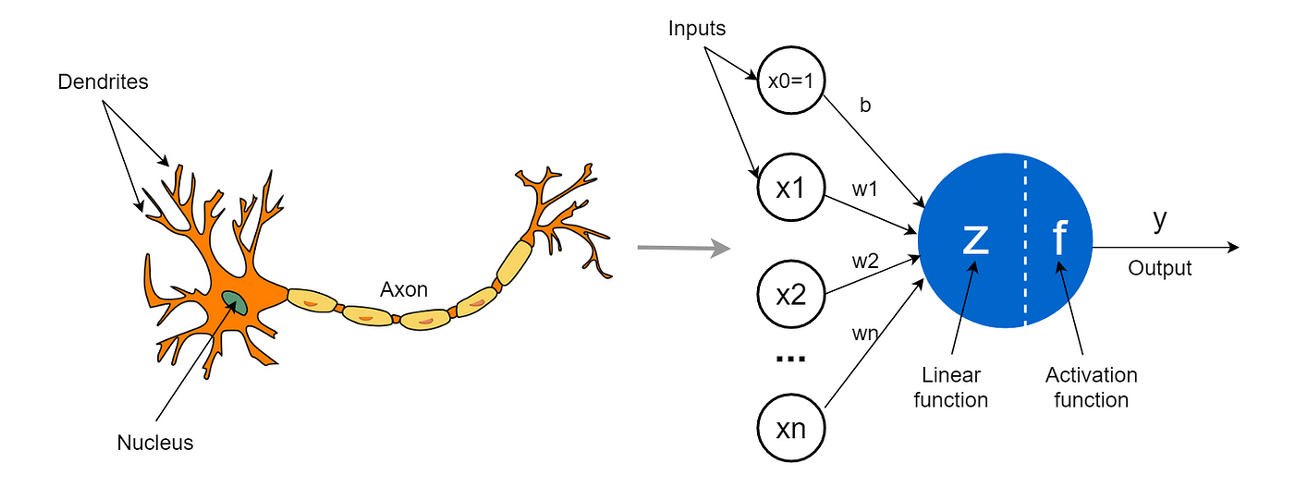

In [ ]:
# Creating a Neural Network Model
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

#create model
model = Sequential() #layers that are dependent to each athor

# add the input layer
model.add(keras.layers.Dense(19,activation='relu'))

#add 3 hidden layers
model.add(keras.layers.Dense(19,activation='relu')) #19 is the number of nodes ,
model.add(keras.layers.Dense(19,activation='relu'))
model.add(keras.layers.Dense(19,activation='relu'))

# add the output layer
model.add(Dense(1))

#Compile model
model.compile(optimizer='Adam',loss='mean_squared_error')


In [ ]:
from keras.callbacks import History
from tensorflow.keras.callbacks import EarlyStopping

history = History()

model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128 , epochs=400 , callbacks =[history])



Epoch 1/400
114/114 [==============================] - 2s 5ms/step - loss: 425264087040.0000 - val_loss: 428790710272.0000
Epoch 2/400
114/114 [==============================] - 0s 4ms/step - loss: 423952678912.0000 - val_loss: 423902511104.0000
Epoch 3/400
114/114 [==============================] - 0s 3ms/step - loss: 403299237888.0000 - val_loss: 373355380736.0000
Epoch 4/400
114/114 [==============================] - 0s 3ms/step - loss: 302079868928.0000 - val_loss: 211007963136.0000
Epoch 5/400
114/114 [==============================] - 0s 4ms/step - loss: 140332793856.0000 - val_loss: 89566617600.0000
Epoch 6/400
114/114 [==============================] - 1s 6ms/step - loss: 82172706816.0000 - val_loss: 69561294848.0000
Epoch 7/400
114/114 [==============================] - 1s 5ms/step - loss: 68577718272.0000 - val_loss: 60329414656.0000
Epoch 8/400
114/114 [==============================] - 1s 5ms/step - loss: 61580984320.0000 - val_loss: 55604183040.0000
Epoch 9/400
114/114 [==

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 19)                380       
                                                                 
 dense_41 (Dense)            (None, 19)                380       
                                                                 
 dense_42 (Dense)            (None, 19)                380       
                                                                 
 dense_43 (Dense)            (None, 19)                380       
                                                                 
 dense_44 (Dense)            (None, 1)                 20        
                                                                 
Total params: 1540 (6.02 KB)
Trainable params: 1540 (6.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **4) Evaluation of Model Performance**


<Axes: >

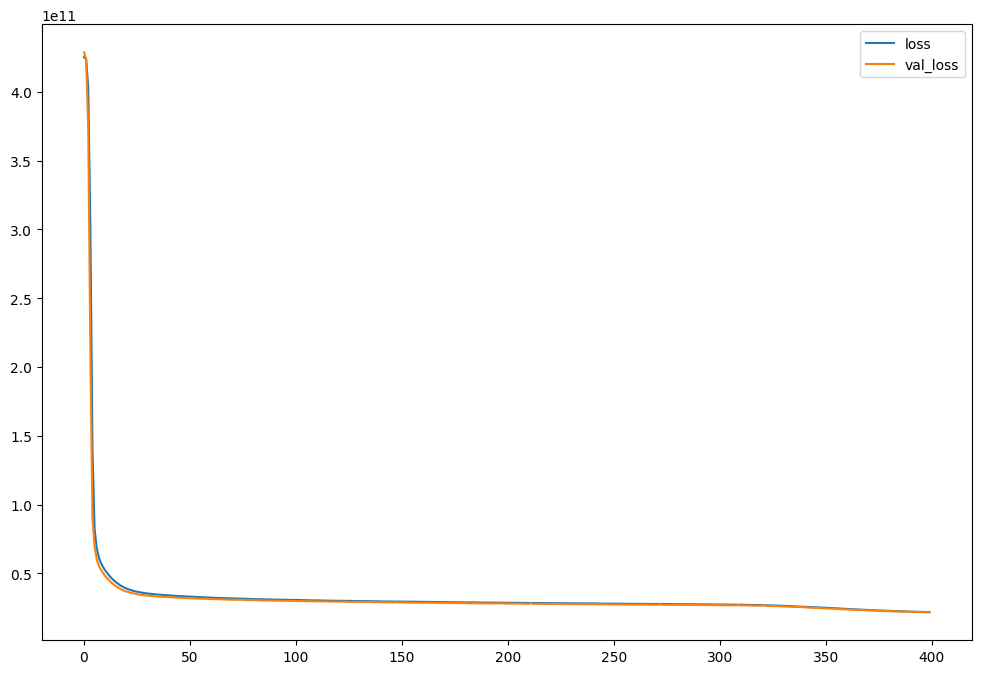

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

## We will try two type of test Evaluation RMSE and R- Squared.
### for Both RMSE and R- Squared quantifies how well a linear regression model fits a dataset.
 - The RMSE tells how well a regression model can predict the value of a response variable in absolute terms
- R- Squared tells how well the predictor variables can explain the variation in the response variable.

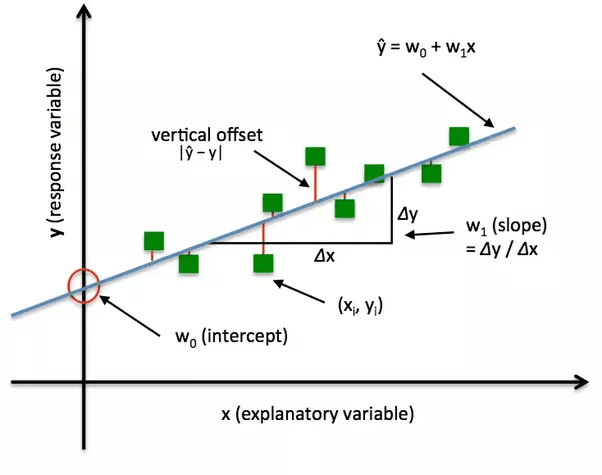

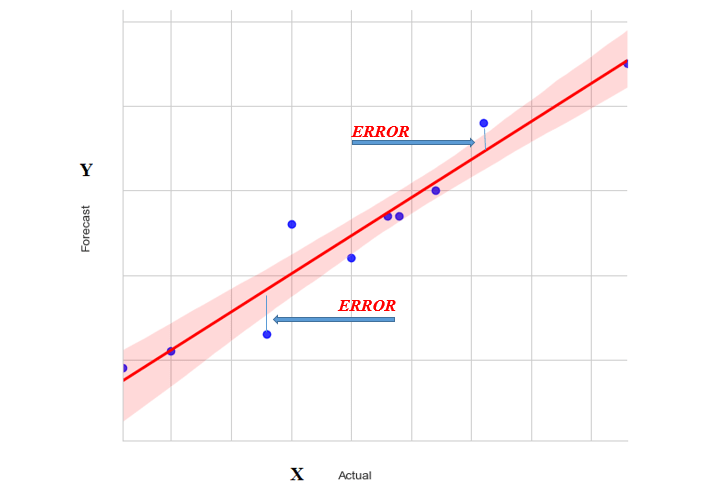

223/223 [==============================] - 0s 2ms/step
MAE: 88204.63548219981
MSE: 21766437767.057575
RMSE: 147534.53076164093
VarScore: 0.8414596012501913


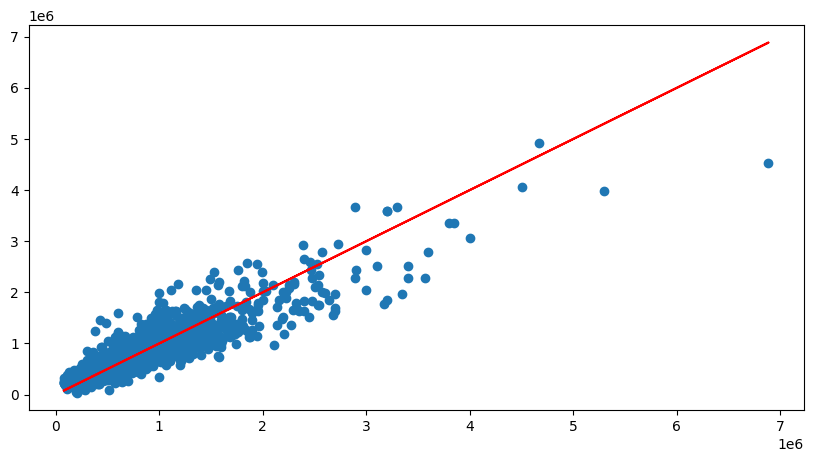

In [ ]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')